In [0]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [453]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [454]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [0]:
#Load the data
data = pd.read_table('WhatsApp Chat with NLP 100 Hours Batch 2.txt',sep='\t')

In [456]:
#View the attributes of the files loaded
data.head()

,"11/12/19, 11:38 AM - +91 6302 217 120 created group ""NLP 100 Hours Batch-2"""
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [457]:
#Set the column name to the text
data.columns=['Text']
data.head()

,Text
0,"11/19/19, 3:46 PM - +91 90348 50345: Drive lin..."
1,"11/19/19, 3:49 PM - +91 82475 90372: Me also w..."
2,"11/19/19, 3:56 PM - +91 94378 01901: It will b..."
3,"11/19/19, 3:56 PM - +91 90900 09356: 👍"
4,"11/19/19, 4:01 PM - +91 72055 31464: Can I ple..."


In [0]:
#Function to check if the data starts with date or not
import re
def startsWithDate(s):
    pattern = '^([0-9]{1,2})(\/)([0-9]{1,2})(\/)([0-9]{2,4},)'
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [0]:
#Function to check if the author name is there or not 

def startsWithAuthor(s):
    patterns = [
              '([\w]+):',
              '([\w]+[\s]+[\w]+):',
              '([\w]+[\s]+[\w]+[\s]+[\w]+):',
              '([+]\d{2} \d{5} \d{5}):',
              '([+]\d{2} \d{3} \d{3} \d{4}):',
              '([+]\d{2} \d{4} \d{7})'
            ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [0]:
#Function to extract the data
def ExtractData(text):
    splitLine = text.split(" - ")
    dateTime = splitLine[0]
    date,time = dateTime.split(", ")
    time1  = time.split(" ")[0]
    am_pm = time.split(" ")[1]
    message = ' '.join(splitLine[1:])
    if startsWithAuthor(message):
        splitMessage = message.split(': ')
        author = splitMessage[0]
        message = ' '.join(splitMessage[1:])
    else:
        author=None
    
    return date,time1,am_pm,author,message

In [0]:
parsedData = []
filepath = 'WhatsApp Chat with NLP 100 Hours Batch 2.txt'
with open(filepath,encoding = 'utf-8') as fp:
    fp.readline()
    messageBuffer=[]
    date,time,am_pm,author=None,None,None,None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                parsedData.append([date,time,am_pm,author,' '.join(messageBuffer)])
                messageBuffer.clear()
                date,time,am_pm,author,message =ExtractData(line)
                messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [0]:
#Create the dataset of the pandas dataframe
df =pd.DataFrame(parsedData,columns=['Date','Time','AM/PM','Author','Message'])
df = df[1:]

**Exploratory Data Analysis**


In [463]:
#Convert the string Date to Date 
df['DATE']= pd.to_datetime(df['Date'])
df['MONTH'] = df['DATE'].dt.month
df["YEAR"] = df['DATE'].dt.year
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name
df.head()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday


In [464]:
def convertTime(time):
  time=pd.to_datetime(time).strftime('%H:%M')
  return time

def gethours(time):
  hour,min = time.split(":")
  return hour


df['Combined_Time_Interval'] = df['Time']+" "+df['AM/PM']
df['TIME']= df['Combined_Time_Interval'].apply(convertTime)
df.drop(['Combined_Time_Interval'],axis=1,inplace=True)
df['HOUR'] = df['TIME'].apply(gethours)
df.head()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday,16:02,16
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday,16:10,16
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday,16:11,16
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday,16:12,16
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday,16:12,16


In [465]:
#Letter and Word Counts
df['Letter_Count'] = df['Message'].apply(lambda s:len(s))
df['Word_Count'] = df['Message'].apply(lambda s:len(s.split(' ')))
df.head()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR,Letter_Count,Word_Count
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday,16:02,16,41,9
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday,16:10,16,117,22
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday,16:11,16,72,13
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday,16:12,16,9,2
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday,16:12,16,19,4


In [466]:
!pip install emoji

In [467]:
#Emoji Extraction

#Function to get the emojis 
import emoji
def extract_emoji(str1):
    return ''.join(c for c in str1 if c in emoji.UNICODE_EMOJI )

df['EMOJI'] = df['Message'].apply(extract_emoji)
df.head(10)

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR,Letter_Count,Word_Count,EMOJI
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday,16:02,16,41,9,
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday,16:10,16,117,22,
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday,16:11,16,72,13,
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday,16:12,16,9,2,
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday,16:12,16,19,4,
6,11/19/19,4:12,PM,+91 81054 54221,😊,2019-11-19,11,2019,Tuesday,16:12,16,1,1,😊
7,11/19/19,4:13,PM,+91 98333 91951,Not everyone has access to view recording,2019-11-19,11,2019,Tuesday,16:13,16,41,7,
8,11/19/19,4:14,PM,+91 81054 54221,Ohh okay ... Got it 😊,2019-11-19,11,2019,Tuesday,16:14,16,21,6,😊
9,11/19/19,4:14,PM,+91 93993 84457,I think you can access same day only,2019-11-19,11,2019,Tuesday,16:14,16,36,8,
10,11/19/19,4:15,PM,+91 90321 13803,"Shubham, As per today's class , prudvi said h...",2019-11-19,11,2019,Tuesday,16:15,16,135,24,


In [468]:
df.head()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR,Letter_Count,Word_Count,EMOJI
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday,16:02,16,41,9,
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday,16:10,16,117,22,
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday,16:11,16,72,13,
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday,16:12,16,9,2,
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday,16:12,16,19,4,


In [469]:
df.tail()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR,Letter_Count,Word_Count,EMOJI
1986,1/27/20,10:47,PM,+91 89896 40838,Top users you mean members with high number of...,2020-01-27,1,2020,Monday,22:47,22,51,10,
1987,1/27/20,10:47,PM,AVI,Yes,2020-01-27,1,2020,Monday,22:47,22,3,1,
1988,1/27/20,10:47,PM,+91 89896 40838,Yess done,2020-01-27,1,2020,Monday,22:47,22,9,2,
1989,1/27/20,10:47,PM,+91 89896 40838,But contact was not saved,2020-01-27,1,2020,Monday,22:47,22,25,5,
1990,1/27/20,10:47,PM,+91 89896 40838,Soo got the numbers,2020-01-27,1,2020,Monday,22:47,22,19,4,


In [470]:
df.describe()

,MONTH,YEAR,Letter_Count,Word_Count
count,1990.000000,1990.000000,1990.000000,1990.000000
mean,6.987437,2019.439698,45.683920,8.300503
std,5.316749,0.496475,50.133979,9.223941
min,1.000000,2019.000000,1.000000,1.000000
25%,1.000000,2019.000000,15.000000,2.000000
50%,11.000000,2019.000000,30.000000,6.000000
75%,12.000000,2020.000000,61.000000,11.000000
max,12.000000,2020.000000,613.000000,109.000000


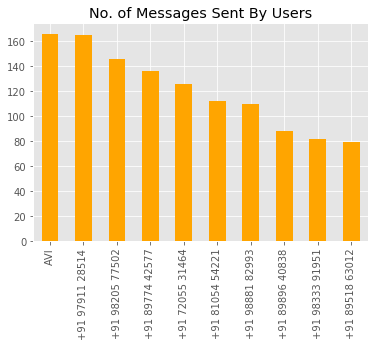

In [471]:
#Top 10 Senders
counts = df['Author'].value_counts()[:10]
counts.plot(kind='bar',title="No. of Messages Sent By Users", color ='orange')

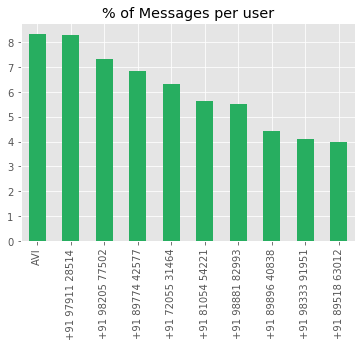

In [472]:
#Top 10 Senders in Proportion
prop = round(df['Author'].value_counts()[:10]/len(df)*100,2)
prop.plot(kind='bar',title='% of Messages per user',color='#27AE60')

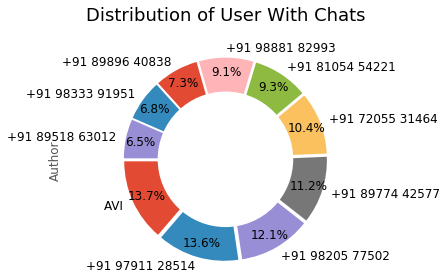

In [473]:
#Proportion of Messages sent by Users(Pie Chart)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('Author')['Author'].count().nlargest(10)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    # color = ['#1E8449','#F39C12','#27AE60','#17A589','#21618C','#9B59B6','#797D7F','#E74C3C','#145A32' ,'#F1C40F']
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)



Text(0, 0.5, 'No of Messages')

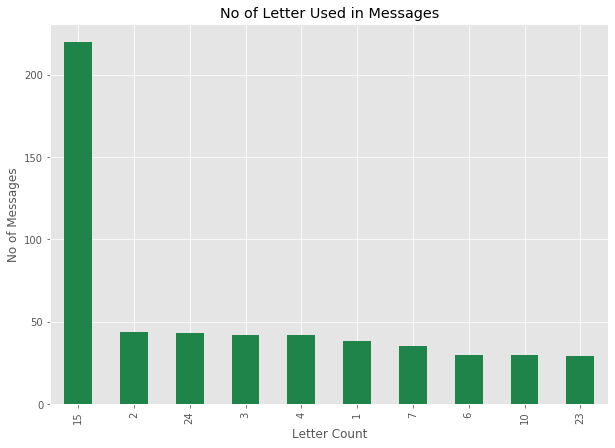

In [474]:
#No of Letters in a Messages
plt.figure(figsize=(10,7))
no_of_letter = df['Letter_Count'].value_counts()
no_of_letter=no_of_letter[:10]
no_of_letter.plot(kind='bar', title='No of Letter Used in Messages',color='#1E8449')
plt.xlabel("Letter Count")
plt.ylabel("No of Messages")

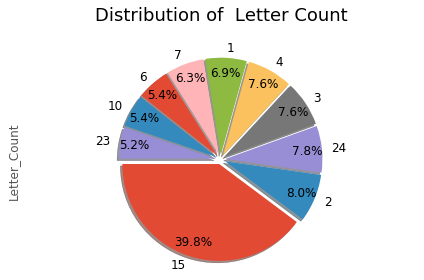

In [475]:
#Proportion of No of Letters in  Message
def pie_chart_plot(no_of_letter):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(no_of_letter)):
        explodex.append(0.05)
    ax = no_of_letter.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of  Letter Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   
pie_chart_plot(no_of_letter)

Text(0, 0.5, 'No of Messages')

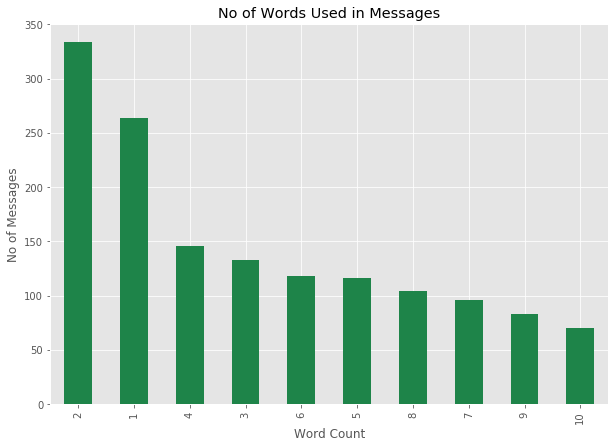

In [476]:
#Distribution of Word Counts
plt.figure(figsize=(10,7))
no_of_words = df['Word_Count'].value_counts()
no_of_words=no_of_words[:10]
no_of_words.plot(kind='bar', title='No of Words Used in Messages',color='#1E8449')
plt.xlabel("Word Count")
plt.ylabel("No of Messages")

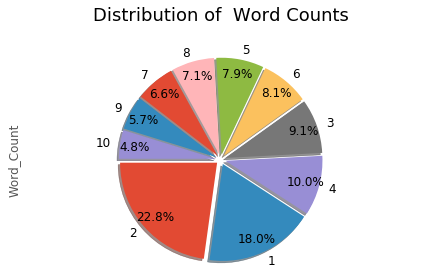

In [477]:
#Proportion of No of Words in  Message
def pie_chart_plot(no_of_words):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(no_of_words)):
        explodex.append(0.05)
    ax = no_of_words.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of  Word Counts\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart_plot(no_of_words)

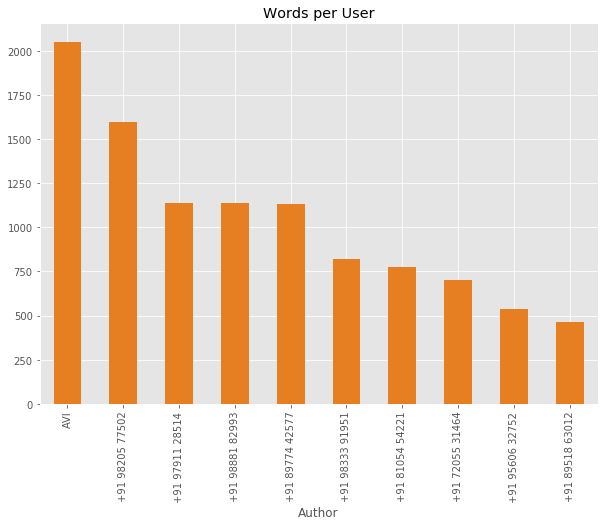

In [478]:
#Distribution of Users with word counts
plt.figure(figsize=(10,7))
word_counts_per_user = df.groupby(['Author'])['Word_Count'].sum().nlargest(10)
word_counts_per_user.plot(kind='bar',title='Words per User',color='#E67E22')

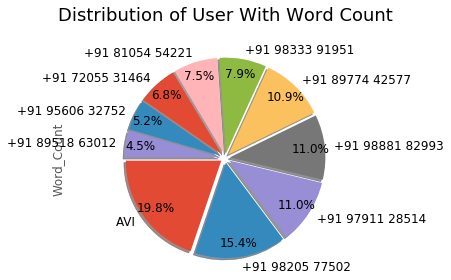

In [479]:
#Distribution per User(Word Counts)
def pie_chart_plot(word_count):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(word_counts_per_user)

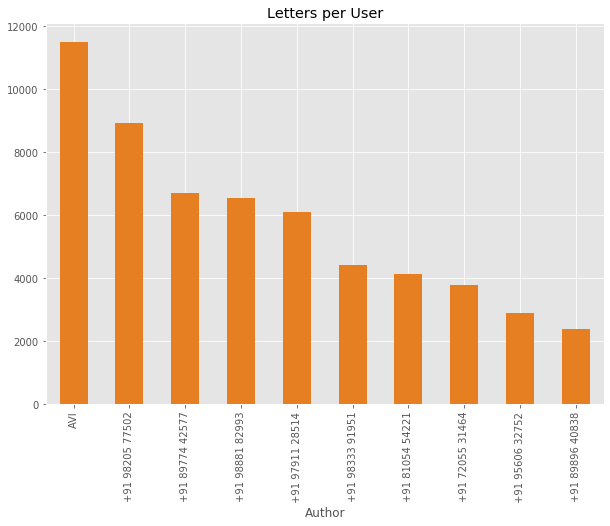

In [480]:
#Distribution of Users with Letter counts
plt.figure(figsize=(10,7))
letter_counts_per_user = df.groupby(['Author'])['Letter_Count'].sum().nlargest(10)
letter_counts_per_user.plot(kind='bar',title='Letters per User',color='#E67E22')

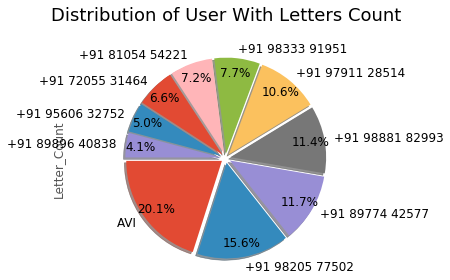

In [481]:
#Distribution per User(Letter Counts)
def pie_chart_plot(letter_count):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(letter_count)):
        explodex.append(0.05)
    ax = letter_count.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Letters Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(letter_counts_per_user)

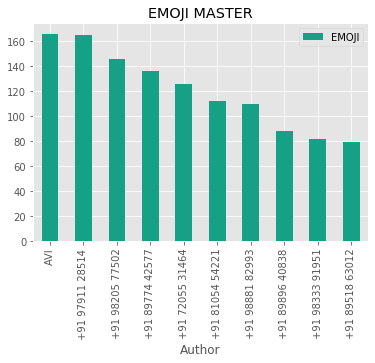

In [482]:
EMOJIS_PER_USER = df.groupby('Author').count()['EMOJI'].reset_index()
EMOJIS_PER_USER.sort_values('EMOJI',ascending=False,inplace=True)
EMOJIS_PER_USER[:10].plot('Author','EMOJI',kind='bar',title='EMOJI MASTER',color='#16A085')

In [483]:
import collections
import emoji
df["Author"].unique()
emoji_ctr = collections.Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
        emojis_found = r.findall(row["Message"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

👍 - 77
🏻 - 31
😊 - 23
😂 - 19
😅 - 13
😀 - 11
😁 - 10
😜 - 8
🏼 - 4
🤟 - 4


**DATE TIME VISUALIZATION**

<Figure size 1440x504 with 0 Axes>

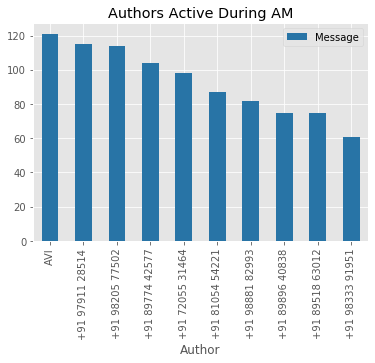

In [484]:
#Users Activity By Time
plt.figure(figsize=(20,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='AM']
active_time.sort_values('Message',ascending=False)[:10].plot(x='Author',kind='bar',title='Authors Active During AM',color='#2874A6')


<Figure size 720x504 with 0 Axes>

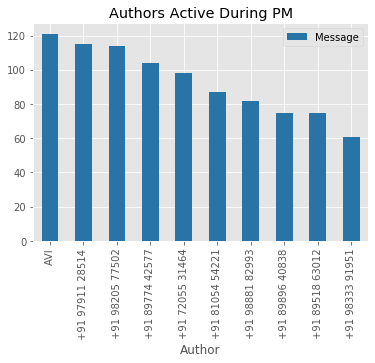

In [485]:
plt.figure(figsize=(10,7))
active_time = df[['AM/PM','Message','Author']]
active_time = active_time.groupby(['AM/PM','Author']).count().reset_index()
active_time[active_time['AM/PM']=='PM']
active_time = active_time.sort_values('Message',ascending=False)[:10]
active_time.plot(x='Author',kind='bar',title="Authors Active During PM",color='#2874A6')

In [0]:
#DateWise Count of Messages
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts().nlargest(10)

Text(0, 0.5, 'No of Messages')

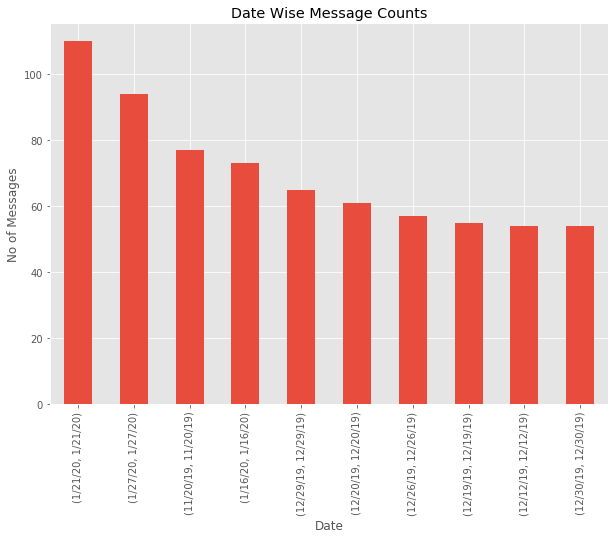

In [487]:
plt.figure(figsize=(10,7))
datewise_message_counts.plot(kind='bar',title='Date Wise Message Counts',color='#E74C3C')
plt.xlabel("Date")
plt.ylabel("No of Messages")

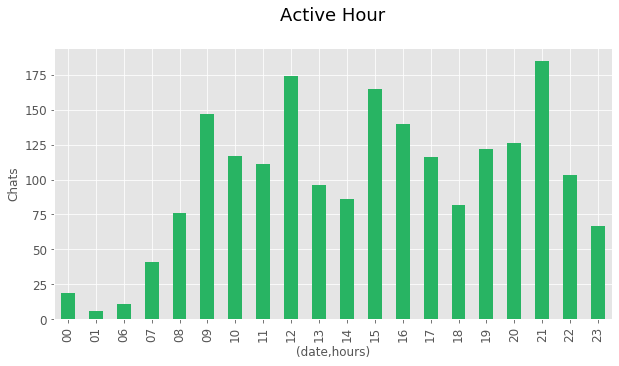

In [488]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hours=df.groupby(['HOUR'])['HOUR'].count()
def active_hour_plots(active_hours,kind='bar',figsize=(10,12)):
    plt.figure(figsize=figsize)
    ax = active_hours.plot(kind=kind,color='#F39C12', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Hour", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)

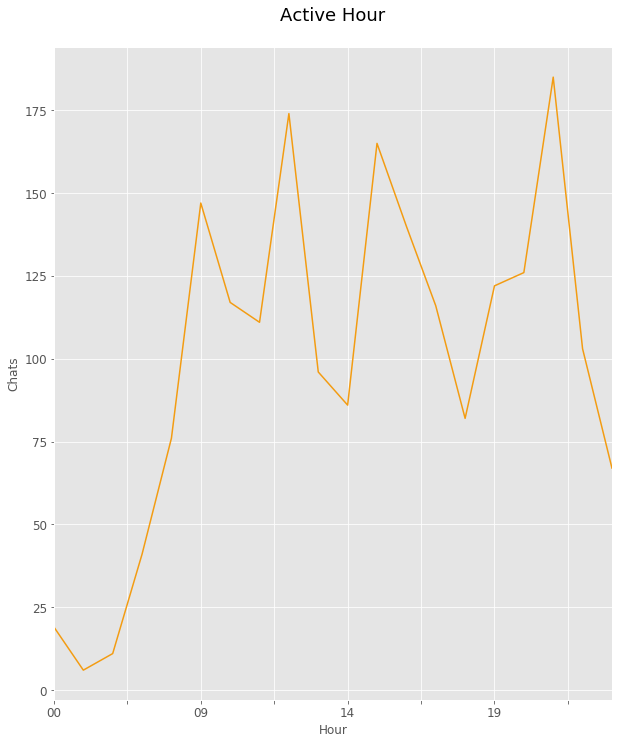

In [489]:
#Active Hour Line Charts

# active_hour_line_group=df.groupby(['Hour'])['Hour'].count()
active_hours=df.groupby(['HOUR'])['HOUR'].count()
active_hour_plots(active_hour_line_group,kind='line',figsize=(10,12))

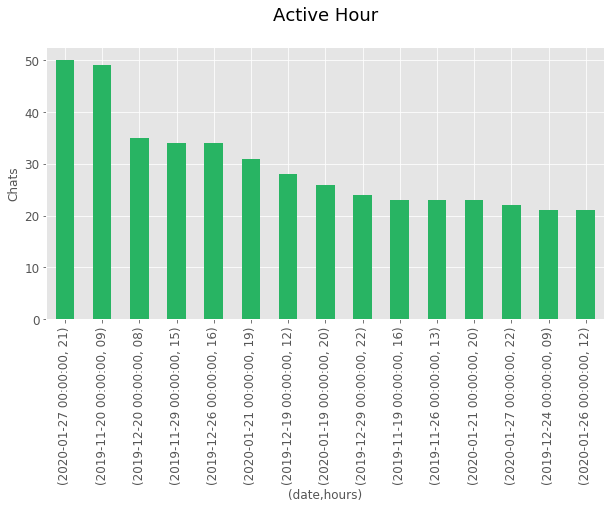

In [490]:
active_hour_bar_group=df.groupby(['DATE','HOUR'])['HOUR'].count().nlargest(15)
def active_hour_line_chart(active_hour_line_group):
    plt.figure(figsize=(10,5))
    ax = active_hour_line_group.plot(kind='bar',color='#28B463', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(date,hours)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_bar_group)

In [0]:
datewise_message_counts = df.groupby(['Date'],sort=False)['Date'].value_counts()
dates = df.groupby('Date',sort=False)['Date'].count()
# dates.sort_values(ascending=False)
# dates[:10]

In [0]:
def plot_linechart(data):
    plt.figure(figsize=(10,7))
    ax= data.plot(kind='line',color='green',fontsize=15)
    ax.set_title('Distribution of Date with No of Messages',fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

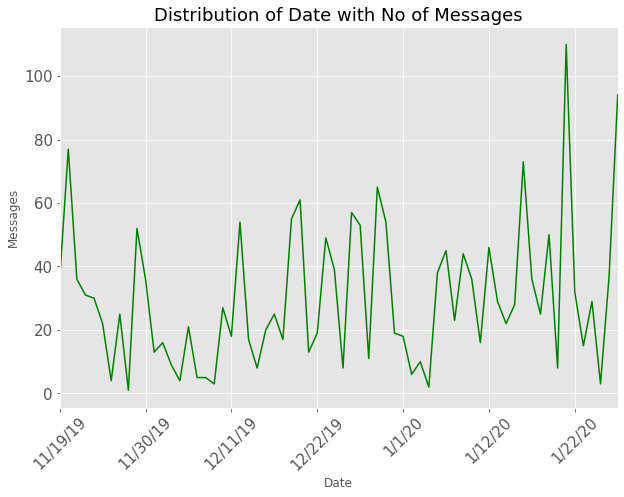

In [493]:
plot_linechart(dates)

In [494]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [0]:
from nltk import pos_tag
from nltk import word_tokenize
from collections import Counter
def get_pos_tags(data):
  #Lowercase the data
  lower_case = data.lower()
  #Tokenize the data
  tokens = word_tokenize(lower_case)
  #Tag the tokens
  tags = pos_tag(tokens,tagset='universal')
  counts = Counter(tag for word,tag in tags if tag in ('NOUN','PRON','VERB','ADV',"ADJ"))
  return counts

In [496]:
tokens_counts = df['Message'].apply(get_pos_tags).sum()
tokens_counts

Counter({'ADJ': 1430, 'ADV': 1082, 'NOUN': 5419, 'PRON': 985, 'VERB': 4024})

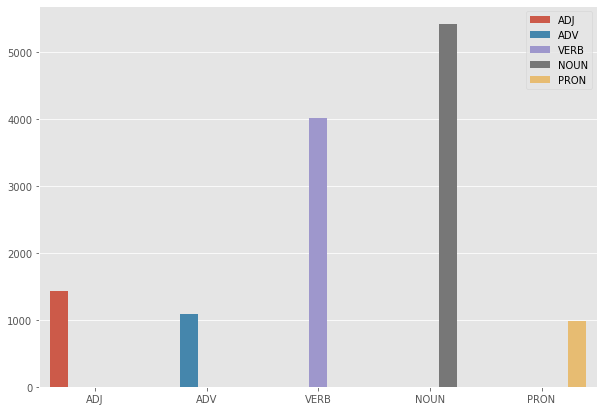

In [497]:
labels = list(tokens_counts.keys())
values = list(tokens_counts.values())
import seaborn as sns
plt.figure(figsize=(10,7))
sns.barplot(x=labels,y=values,hue=labels)

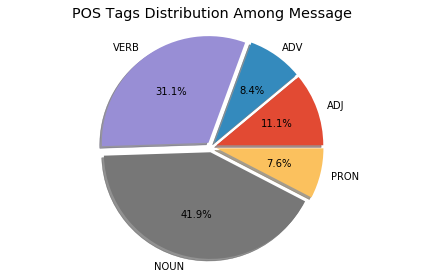

In [498]:
#POS TAGS DISTRIBUTIONS IN CHATS
labels = list(tokens_counts.keys())
values = list(tokens_counts.values())
fig,ax1 = plt.subplots()
explode = []
for i in np.arange(len(values)):
        explode.append(0.05)

ax1.pie(values,labels = labels,autopct='%1.1f%%',shadow=True,explode=explode)
ax1.axis('equal')
plt.title("POS Tags Distribution Among Message")
plt.tight_layout()
plt.show()

In [0]:
data = df.groupby('DAY_OF_WEEK')['HOUR'].value_counts().reset_index(name='COUNTS_PER_DAY_PER_HOUR')
# data.columns

In [500]:
data.head()

,DAY_OF_WEEK,HOUR,COUNTS_PER_DAY_PER_HOUR
0,Friday,15,53
1,Friday,08,36
2,Friday,11,36
3,Friday,10,29
4,Friday,09,28


Text(0.5, 1, 'No of Messages Sent (Day Wise vs Hour)')

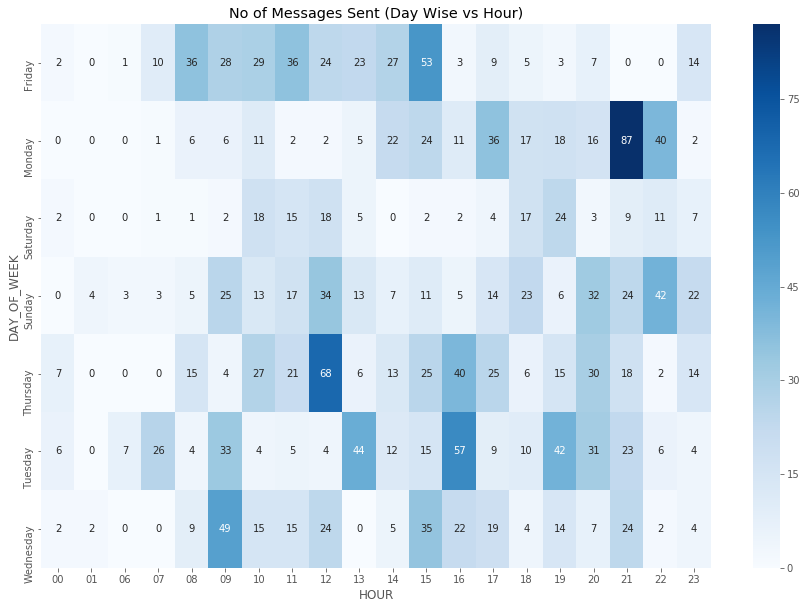

In [501]:
data1 = data.pivot("DAY_OF_WEEK","HOUR","COUNTS_PER_DAY_PER_HOUR")
data1.fillna(0,inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(data1,annot=True,cmap='Blues')
plt.title('No of Messages Sent (Day Wise vs Hour)')

**More Visualizations are pending.Pending Task from here.**

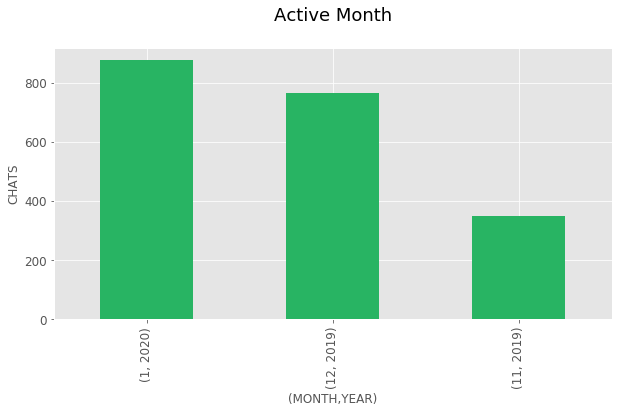

In [502]:
#Visualizations
#Most Active Month
active_month=df.groupby(['MONTH','YEAR'])['MONTH'].count().nlargest(15)
def active_month_plot(active_hour_line_group):
    plt.figure(figsize=(10,5))
    ax = active_hour_line_group.plot(kind='bar',color='#28B463', fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("(MONTH,YEAR)", fontsize=12)
    ax.set_ylabel("CHATS", fontsize=12)
    plt.show()
active_month_plot(active_month)

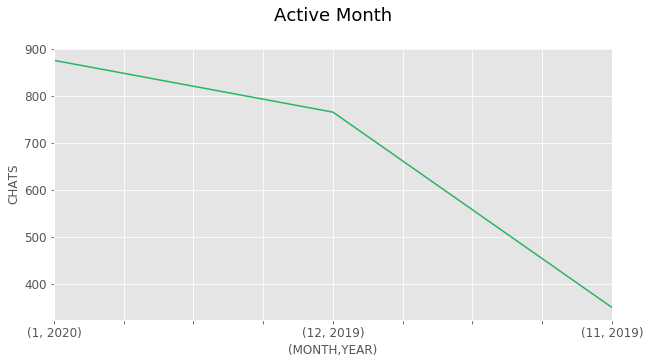

In [503]:
active_month=df.groupby(['MONTH','YEAR'])['MONTH'].count().nlargest(15)
def active_month_plot(active_hour_line_group):
    plt.figure(figsize=(10,5))
    ax = active_hour_line_group.plot(kind='line',color='#28B463', fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("(MONTH,YEAR)", fontsize=12)
    ax.set_ylabel("CHATS", fontsize=12)
    plt.show()
active_month_plot(active_month)

In [0]:
active_month1= df.groupby(['MONTH','YEAR'])['MONTH'].count()

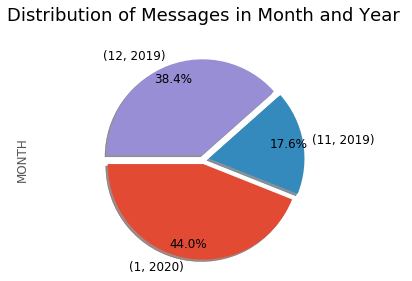

In [505]:
def pie_chart_plot(active_month1):
    fig,ax = plt.subplots()
    explodex =[]
    for i in np.arange(len(active_month1)):
        explodex.append(0.05)
    ax = active_month1.plot(kind='pie',shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of Messages in Month and Year \n", fontsize=18)
    plt.tight_layout()
    plt.show()
    
pie_chart_plot(active_month1)

In [506]:
!pip install wordcloud

In [0]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import re
import string

def cleantextualdata(text):
    data = text.lower()
    data = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', data)
    data = re.sub(r'#(\w+)','',data)
    data = re.sub(r'@(\w+)','',data)
    data = "".join([text for text in data if text not in string.punctuation])
    return data

In [508]:
df['CLEAN_MESSAGE'] = df['Message'].apply(cleantextualdata)
df.head()

,Date,Time,AM/PM,Author,Message,DATE,MONTH,YEAR,DAY_OF_WEEK,TIME,HOUR,Letter_Count,Word_Count,EMOJI,CLEAN_MESSAGE
1,11/19/19,4:02,PM,+91 99875 07468,Same here I cud t attend .. office issues,2019-11-19,11,2019,Tuesday,16:02,16,41,9,,same here i cud t attend office issues
2,11/19/19,4:10,PM,+91 81054 54221,"I think there is ""view recordings"" section is ...",2019-11-19,11,2019,Tuesday,16:10,16,117,22,,i think there is view recordings section is sh...
3,11/19/19,4:11,PM,+91 81054 54221,Only theory... Try to catch next session becau...,2019-11-19,11,2019,Tuesday,16:11,16,72,13,,only theory try to catch next session because ...
4,11/19/19,4:12,PM,+91 72055 31464,Sure sure,2019-11-19,11,2019,Tuesday,16:12,16,9,2,,sure sure
5,11/19/19,4:12,PM,+91 72055 31464,Thanks for the note,2019-11-19,11,2019,Tuesday,16:12,16,19,4,,thanks for the note


In [0]:
text = " ".join(mess for mess in df['CLEAN_MESSAGE'])
text = text.replace("media omitted","")
text ="".join(data for data in text if (data!=string.punctuation or data.isalpha()==False))
# print(text)
stop_words = STOPWORDS
stop_words.add('will')

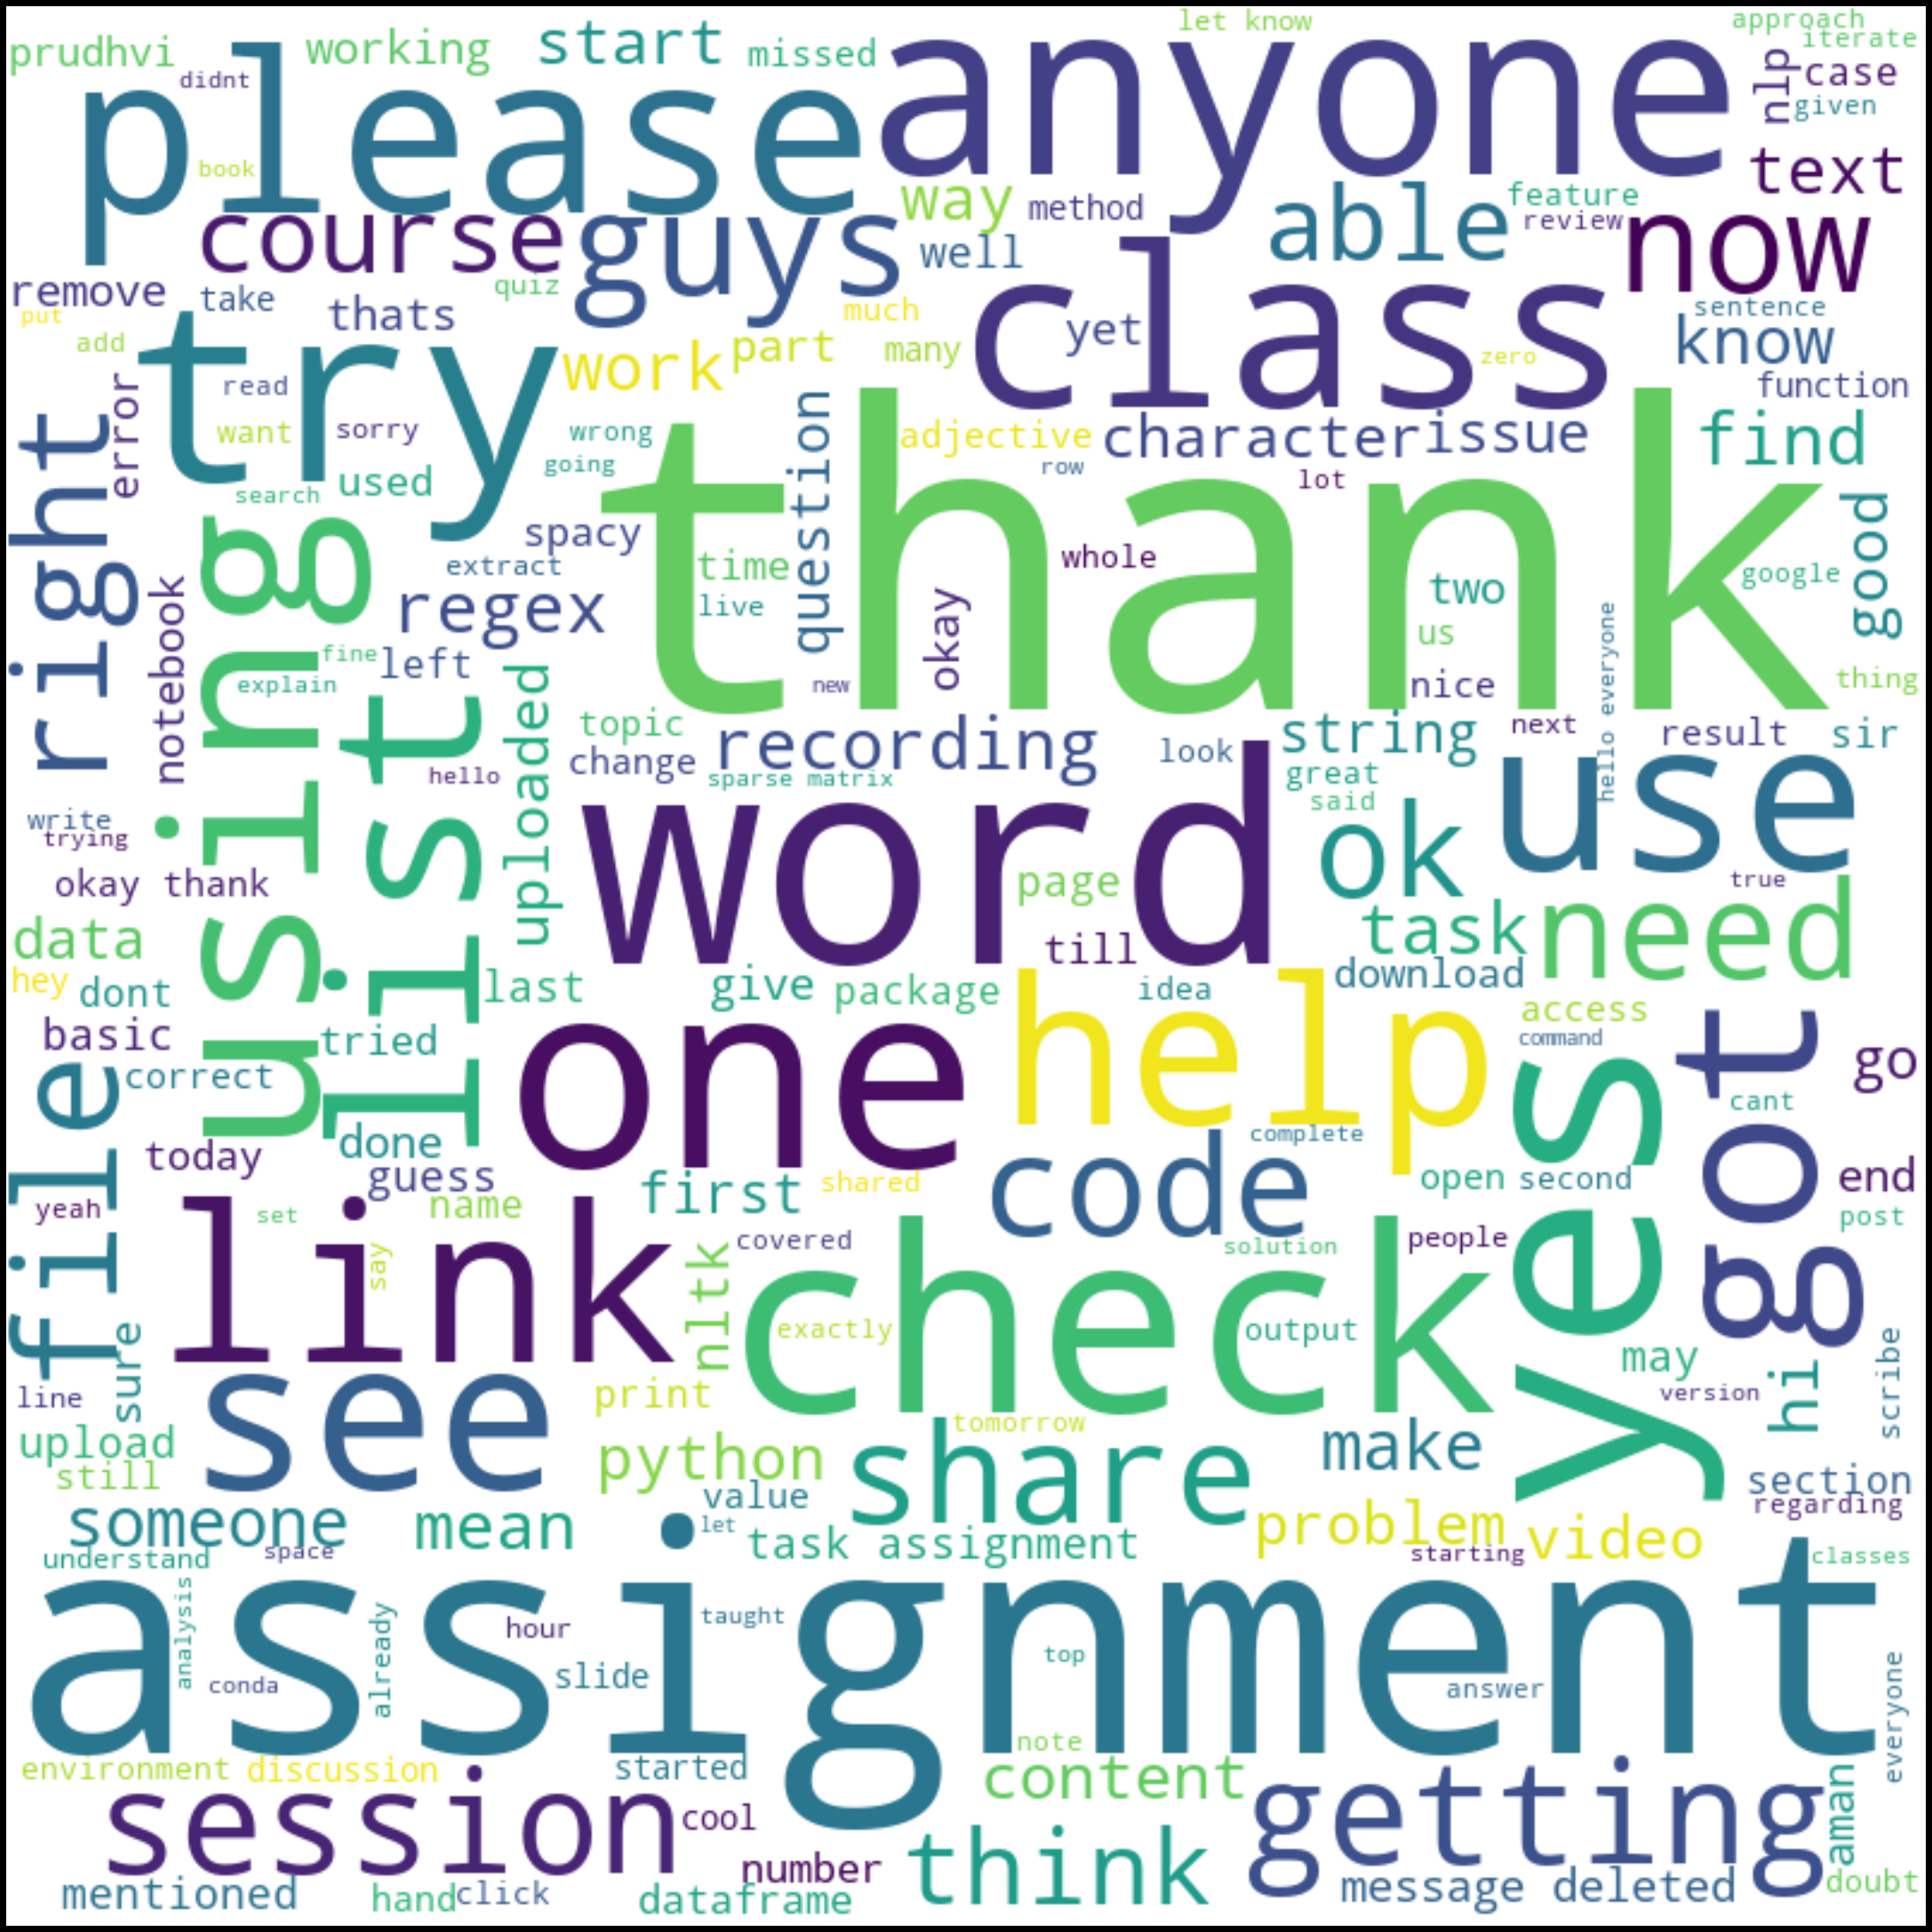

In [513]:
#Generating the wordcloud
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color = 'white',
    stopwords=stop_words
).generate(text)

#Plot the figure
fig = plt.figure(
     figsize=(40,30),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Completed Tasks**


1.   Hour Wise Activity(Most Active Time)
2.   Hour Wise User Activity(Active User Time)
3.   Most Active Month


**Pending Task/Visualizations**

1.   Mentions Extraction
2.   Word Cloud(Little Modification is needed). 


